<a href="https://colab.research.google.com/github/cdong22ucla/lab0113/blob/main/0210lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [ ]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [ ]:
df_select = df[['case_status', 'class_of_admission', 'pw_source_name_9089', 'pw_level_9089', 'pw_amount_9089']]

# 3.) Clean your data for a decision tree


In [ ]:
df_select = df[(df['pw_unit_of_pay_9089'] == 'yr') | (df['pw_unit_of_pay_9089'] =='Year')]\
[['case_status', 'class_of_admission', 'pw_source_name_9089', 'pw_level_9089', 'pw_amount_9089']]
df_select = df_select.dropna(axis = 0, how = 'any')

In [ ]:
df_select.reset_index(drop=True, inplace=True)
df_select

,case_status,class_of_admission,pw_source_name_9089,pw_level_9089,pw_amount_9089
0,Certified,J-1,OES,Level II,75629.0
1,Denied,B-2,OES,Level I,37024.0
2,Certified,H-1B,OES,Level I,47923.0
3,Certified,L-1,OES,Level IV,94890.0
4,Denied,EWI,OES,Level I,37024.0
...,...,...,...,...,...
318470,Withdrawn,H-1B,OES,Level III,"142,938.00"
318471,Withdrawn,L-1,OES,Level III,"107,744.00"
318472,Withdrawn,H-1B,OES,Level II,"79,082.00"
318473,Withdrawn,B-2,OES,Level III,"37,981.00"


In [ ]:
X = pd.get_dummies(df_select[['class_of_admission', 'pw_source_name_9089', 'pw_level_9089']])

In [ ]:
X['pw_amount_9089'] = [float(str(i).replace(",", "")) for i in df_select["pw_amount_9089"]]

In [ ]:
y = df_select["case_status"]

# 4.) Fit and plot a decision tree of depth X


In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'pw_amount_9089 <= 81570.0\ngini = 0.587\nsamples = 318475\nvalue = [156539, 129897, 17180, 14859]\nclass = Certified'),
 Text(0.25, 0.625, 'pw_amount_9089 <= 52331.5\ngini = 0.611\nsamples = 131971\nvalue = [60293, 54635, 10257, 6786]\nclass = Certified'),
 Text(0.125, 0.375, 'class_of_admission_H-1B <= 0.5\ngini = 0.645\nsamples = 36847\nvalue = [16856, 13107, 4505, 2379]\nclass = Certified'),
 Text(0.0625, 0.125, 'gini = 0.663\nsamples = 17252\nvalue = [8016, 5188, 2696, 1352]\nclass = Certified'),
 Text(0.1875, 0.125, 'gini = 0.622\nsamples = 19595\nvalue = [8840, 7919, 1809, 1027]\nclass = Certified'),
 Text(0.375, 0.375, 'pw_amount_9089 <= 54059.6\ngini = 0.595\nsamples = 95124\nvalue = [43437, 41528, 5752, 4407]\nclass = Certified'),
 Text(0.3125, 0.125, 'gini = 0.531\nsamples = 4183\nvalue = [1227, 2574, 221, 161]\nclass = Denied'),
 Text(0.4375, 0.125, 'gini = 0.595\nsamples = 90941\nvalue = [42210, 38954, 5531, 4246]\nclass = Certified'),
 Text(0.75, 0.625, 

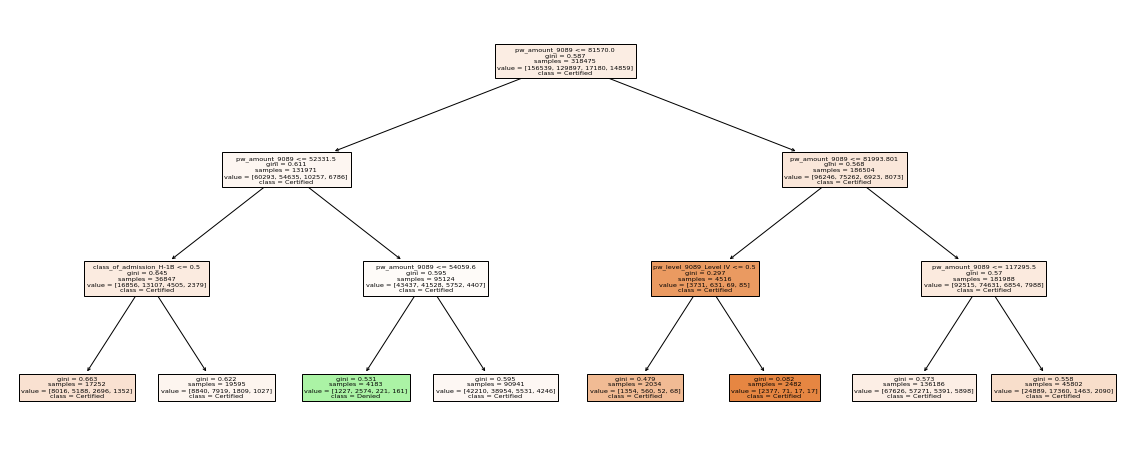

In [ ]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, feature_names = X.columns, class_names = y, filled = True)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node is 51993.301 <= pw_amount_9089 <= 117295.5, and it includes 136186 samples, which means the result of "case_status" through classfication is Certified when "pw_amount_9089" is larger than 51993.301 and also smaller than 117295.5.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [ ]:
outputs = []

# create train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.metrics import accuracy_score
# calculate out of sample accuracy
for md in range(1,101):
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  oos_accuracy =  accuracy_score(y_test, y_pred)
  outputs.append(oos_accuracy)

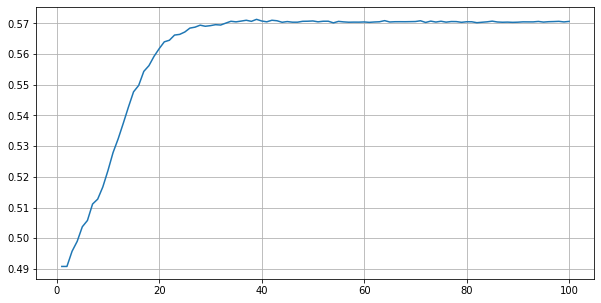

In [ ]:
x = range(1,101)
plt.figure(figsize = (10,5))
plt.plot(x, outputs)
plt.grid()

In [ ]:
outputs.index(max(outputs))

38

In [17]:
max(outputs)

0.5713134400217703

The max depths with the highest accuracy is 39 and the highest accuracy is 0.5713134400217703.